In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
dataset=pd.read_excel('/kaggle/input/forestdataset/Algerian_forest_fires_dataset_UPDATE.xlsx',header=1)

In [11]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [13]:
dataset.shape

(247, 14)

# Cleaning Data

In [14]:
dataset.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [15]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [19]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [21]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [24]:
df[['Region']]=df[['Region']].astype(int)

In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [26]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [27]:
#remove null values
df=df.dropna().reset_index(drop=True)

In [28]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [29]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [32]:
df=df.drop(122).reset_index(drop=True)

In [33]:
df.shape

(243, 15)

In [34]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [36]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [39]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [45]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [47]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.0,3.0,7.0,1.0,3.0,0.0,not fire,0
1,2,6,2012,29,61,13,1.0,64.0,4.0,7.0,1.0,3.0,0.0,not fire,0
2,3,6,2012,26,82,22,13.0,47.0,2.0,7.0,0.0,2.0,0.0,not fire,0
3,4,6,2012,25,89,13,2.0,28.0,1.0,6.0,0.0,1.0,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.0,3.0,14.0,1.0,3.0,0.0,not fire,0


In [48]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.600823,77.403292,14.209877,49.020576,4.329218,16.222222,6.600823,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,1.915875,14.370033,12.391062,47.679582,4.141936,14.243746,7.444639,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.500000,5.000000,12.000000,1.000000,6.000000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.000000,11.000000,33.000000,3.000000,12.000000,4.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.000000,88.000000,20.000000,69.000000,7.000000,22.000000,11.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.000000,96.000000,65.000000,220.000000,19.000000,68.000000,31.000000,1.000000


In [53]:
df_copy=df.drop(['day','month','year'],axis=1)

In [54]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.0,3.0,7.0,1.0,3.0,0.0,not fire,0
1,29,61,13,1.0,64.0,4.0,7.0,1.0,3.0,0.0,not fire,0
2,26,82,22,13.0,47.0,2.0,7.0,0.0,2.0,0.0,not fire,0
3,25,89,13,2.0,28.0,1.0,6.0,0.0,1.0,0.0,not fire,0
4,27,77,16,0.0,64.0,3.0,14.0,1.0,3.0,0.0,not fire,0


In [56]:
df_copy['Classes'] =np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [60]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.0,3.0,7.0,1.0,3.0,0.0,0,0
1,29,61,13,1.0,64.0,4.0,7.0,1.0,3.0,0.0,0,0
2,26,82,22,13.0,47.0,2.0,7.0,0.0,2.0,0.0,0,0
3,25,89,13,2.0,28.0,1.0,6.0,0.0,1.0,0.0,0,0
4,27,77,16,0.0,64.0,3.0,14.0,1.0,3.0,0.0,0,0


In [61]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.0,16.0,44.0,4.0,16.0,6.0,1,1
239,28,87,15,4.0,41.0,6.0,8.0,0.0,6.0,0.0,0,1
240,27,87,29,0.0,45.0,3.0,7.0,0.0,3.0,0.0,0,1
241,24,54,18,0.0,79.0,4.0,15.0,1.0,5.0,0.0,0,1
242,24,64,15,0.0,67.0,3.0,16.0,1.0,4.0,0.0,0,1


In [62]:
df_copy.to_csv('algerian_forest.csv',index=True)

/tmp/ipykernel_35/1062445420.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


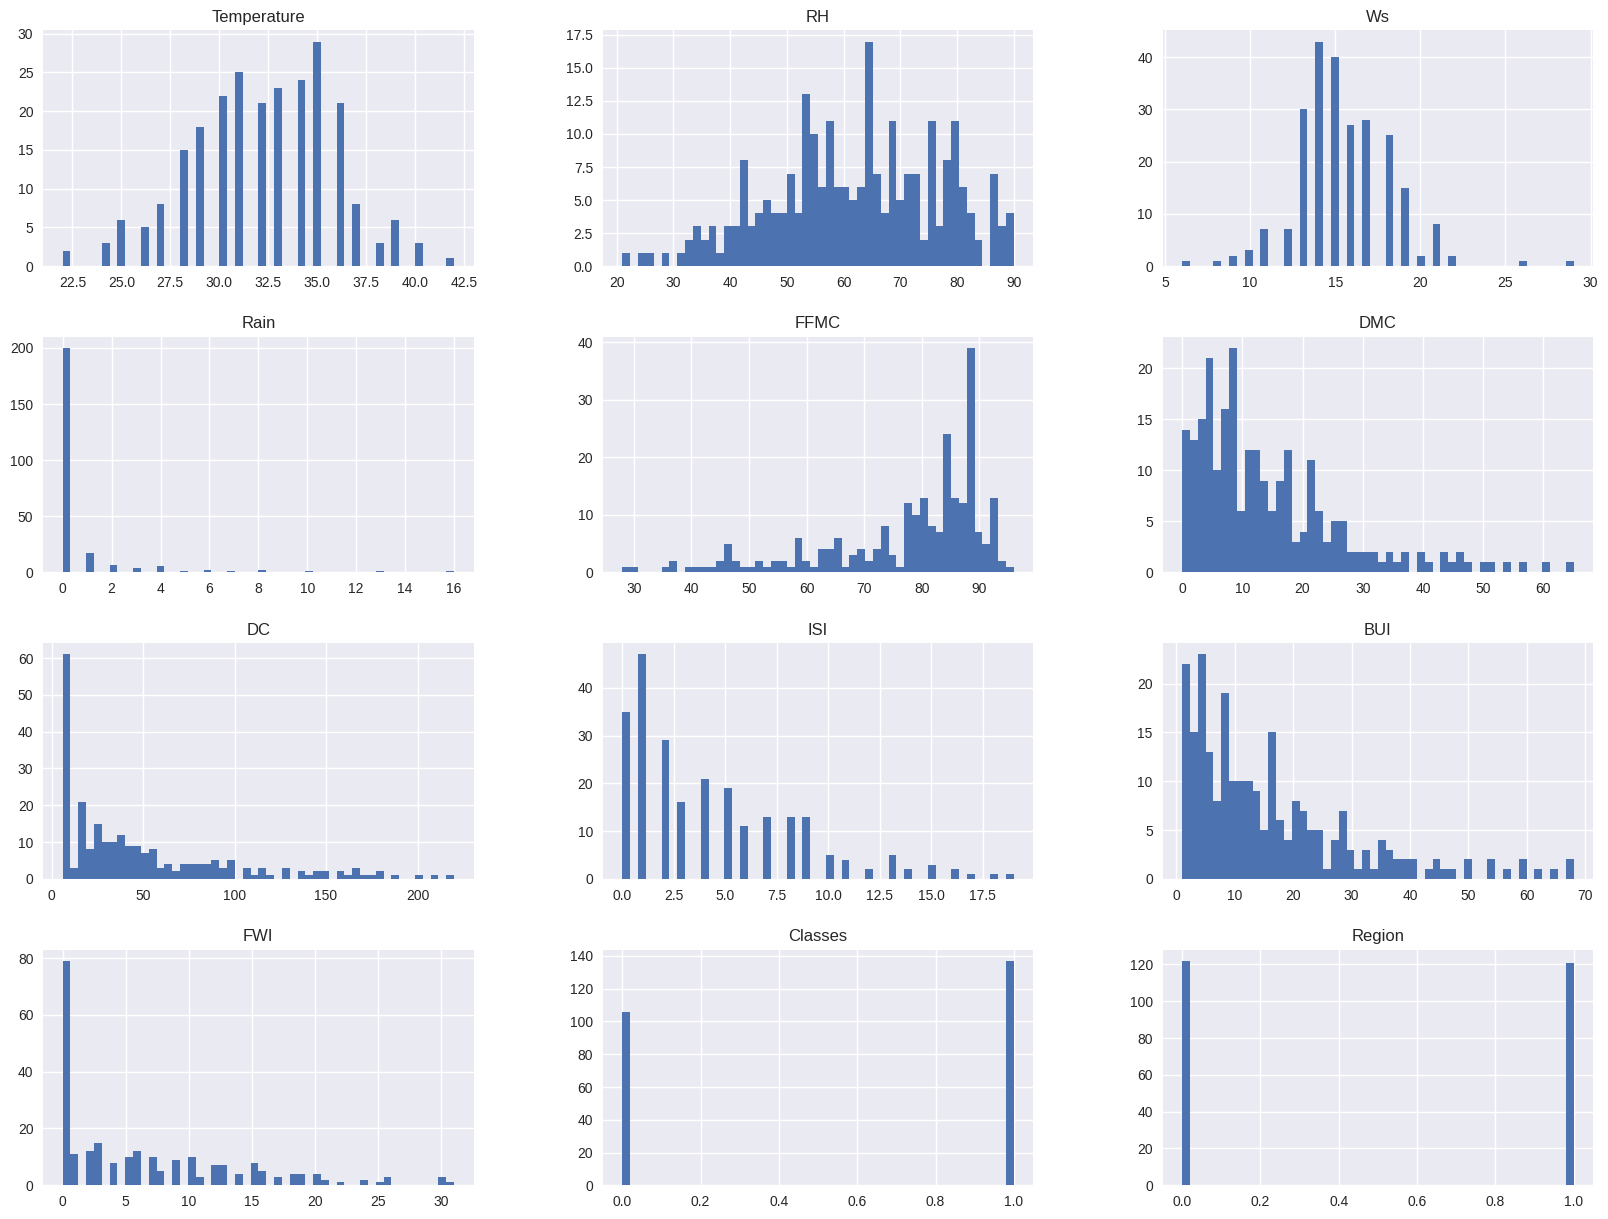

In [63]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

# Correlation

In [64]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.322351,0.677443,0.485904,0.376003,0.601893,0.457610,0.561140,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.212946,-0.644674,-0.409140,-0.226695,-0.685212,-0.350936,-0.573959,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.170238,-0.166354,0.000571,0.078934,0.005143,0.031714,0.037493,-0.069964,-0.181160
Rain,-0.322351,0.212946,0.170238,1.000000,-0.496339,-0.253027,-0.268250,-0.294768,-0.265361,-0.270804,-0.326876,-0.033145
FFMC,0.677443,-0.644674,-0.166354,-0.496339,1.000000,0.604157,0.507689,0.729235,0.592232,0.679905,0.768896,0.222804
DMC,0.485904,-0.409140,0.000571,-0.253027,0.604157,1.000000,0.875447,0.680604,0.981594,0.875854,0.584676,0.191430
DC,0.376003,-0.226695,0.078934,-0.268250,0.507689,0.875447,1.000000,0.502481,0.941716,0.738373,0.510853,-0.078271
ISI,0.601893,-0.685212,0.005143,-0.294768,0.729235,0.680604,0.502481,1.000000,0.640407,0.918229,0.728555,0.269143
BUI,0.457610,-0.350936,0.031714,-0.265361,0.592232,0.981594,0.941716,0.640407,1.000000,0.856439,0.588203,0.089234
FWI,0.561140,-0.573959,0.037493,-0.270804,0.679905,0.875854,0.738373,0.918229,0.856439,1.000000,0.716741,0.197529


<Axes: >

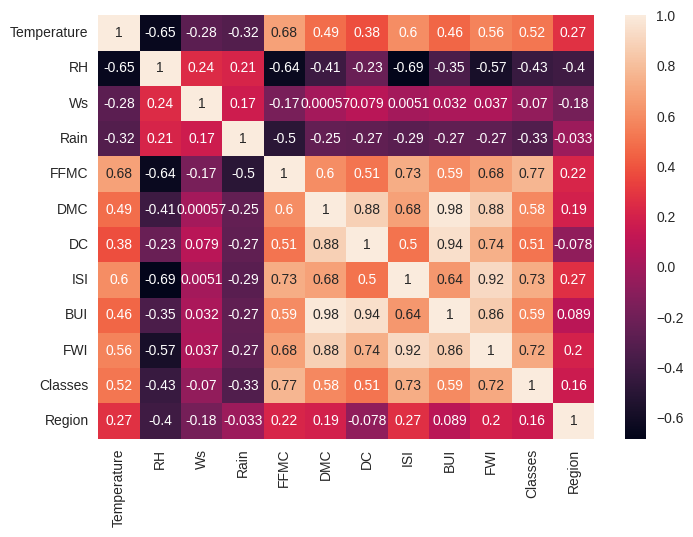

In [66]:
sns.heatmap(df_copy.corr(),annot=True)